In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [150]:
data = pd.read_csv("data/listings_clean.csv", index_col=0)

In [53]:
price_stats = {
    "count": data["price"].count(),
    "mean": data["price"].mean(),
    "median": data["price"].median(),
    "min": data["price"].min(),
    "max": data["price"].max(),
    "std": data["price"].std(),
    "q1": data["price"].quantile(0.25),
    "q3": data["price"].quantile(0.75),
    "IQR": data["price"].quantile(0.75) - data["price"].quantile(0.25)
}

price_stats

{'count': np.int64(62684),
 'mean': np.float64(213.36605832429328),
 'median': np.float64(135.0),
 'min': np.float64(6.0),
 'max': np.float64(74100.0),
 'std': np.float64(860.901556534754),
 'q1': np.float64(75.0),
 'q3': np.float64(225.0),
 'IQR': np.float64(150.0)}

<Axes: xlabel='price', ylabel='Count'>

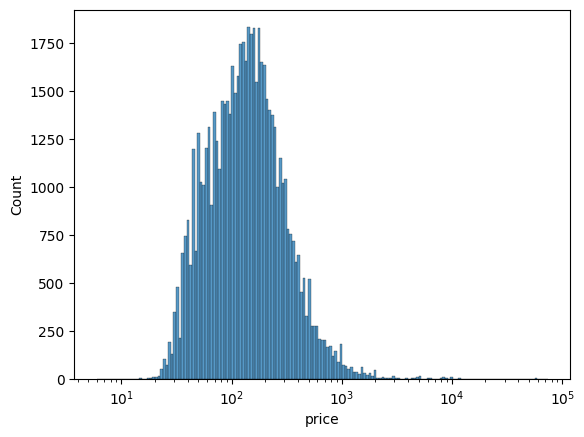

In [39]:
sns.histplot(data["price"], log_scale=True)

In [61]:
upper_fence = price_stats["q3"] + 1.5 * price_stats["IQR"]
lower_fence = price_stats["q1"] - 1.5 * price_stats["IQR"]

print(f"Upper fence: {upper_fence} | Lower fence: {lower_fence}")

Upper fence: 450.0 | Lower fence: -150.0


In [ ]:
upper_outliers = data[data["price"] > upper_fence]
lower_outliers = data[data["price"] < lower_fence]

outliers = pd.concat([upper_outliers, lower_outliers])

outlier_pct = outliers.shape[0] / data.shape[0]
upper_outlier_pct = upper_outliers.shape[0] / data.shape[0]
lower_outlier_pct = lower_outliers.shape[0] / data.shape[0]

print(f"Percentage of Outliers: {outlier_pct:.2%}")
print(f"{upper_outlier_pct:.2%} above upper fence.")
print(f"{lower_outlier_pct:.2%} below the lower fence.")

Percentage of Outliers: 6.69%
6.69% above upper fence.
0.00% below the lower fence.


In [63]:
filtered_data = data[(data.price >= lower_fence) & (data.price <= upper_fence)]

Text(0.5, 1.0, 'Log Scale')

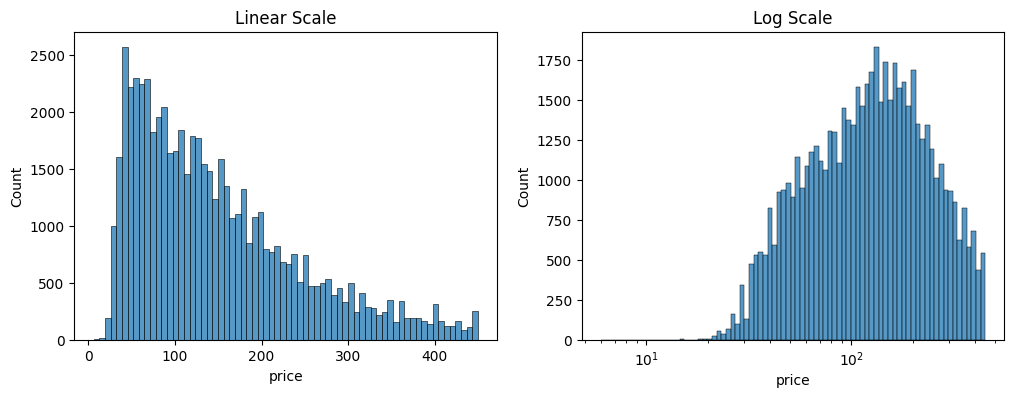

In [74]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(filtered_data["price"], log_scale=False, ax=ax[0])
ax[0].set_title("Linear Scale")
sns.histplot(filtered_data["price"], log_scale=True, ax=ax[1])
ax[1].set_title("Log Scale")

In [79]:
filtered_data["room_type"].unique()

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

In [82]:
room_types = filtered_data.groupby("room_type")

entire_home = room_types.get_group("Entire home/apt")
priv_room = room_types.get_group("Private room")
hotel_room = room_types.get_group("Hotel room")
shared_room = room_types.get_group("Shared room")

<Axes: >

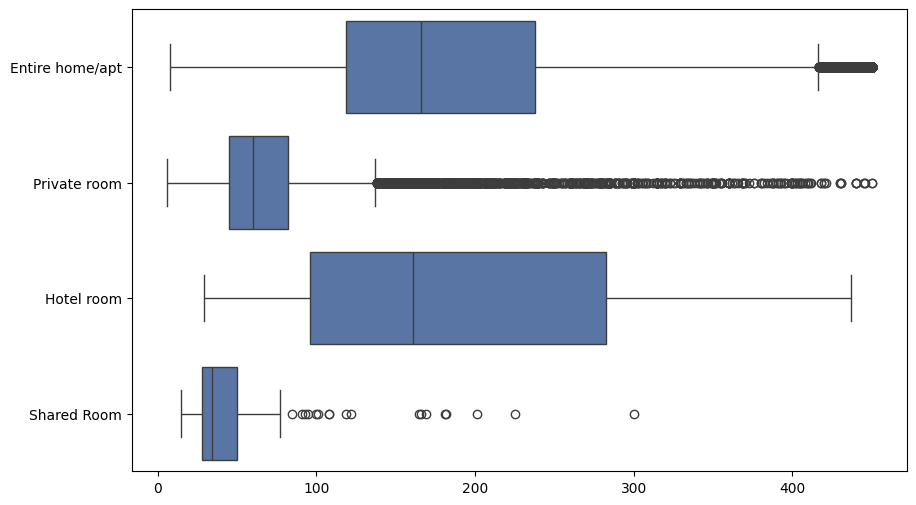

In [124]:
room_types_price = pd.DataFrame(
    {
        "Entire home/apt": entire_home["price"],
        "Private room": priv_room["price"],
        "Hotel room": hotel_room["price"],
        "Shared Room": shared_room["price"]
    }
)

plt.figure(figsize=(10, 6))
sns.boxplot(room_types_price, orient="h", color="#4C72B0")


In [152]:
top_8_neighbourhoods = filtered_data["neighbourhood"].value_counts().sort_values(ascending=False).head(8).index.tolist()
top_8_neighbourhoods_df = filtered_data[filtered_data["neighbourhood"].isin(top_8_neighbourhoods)]

<Axes: xlabel='Price', ylabel='Neighbourhoods'>

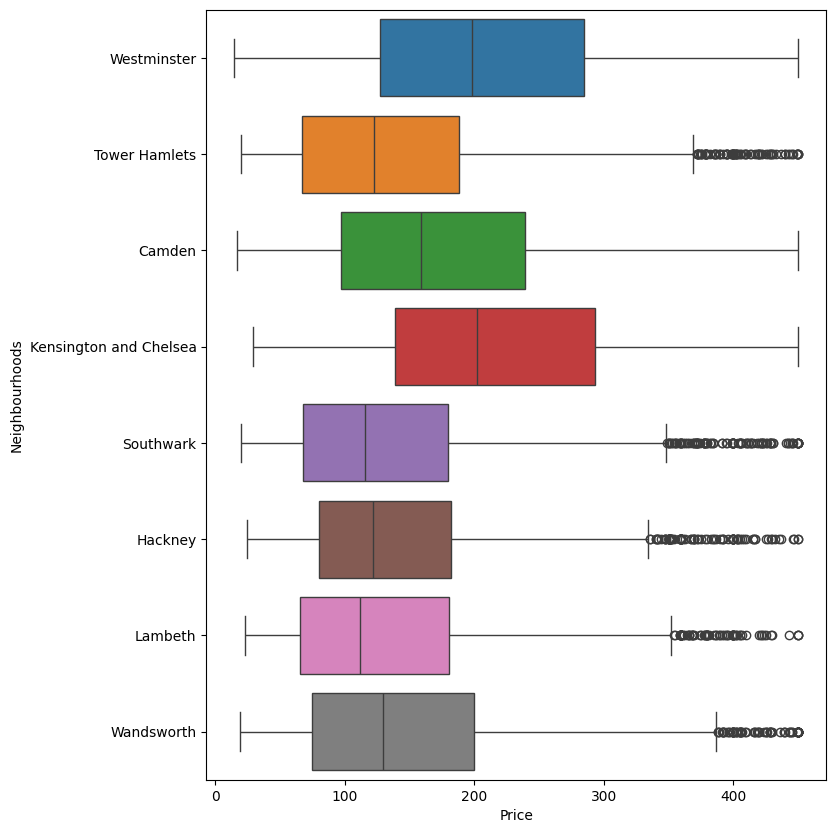

In [159]:
neighbourhoods_group = top_8_neighbourhoods_df.groupby("neighbourhood")

neighbourhoods = {}

for neighbourhood in top_8_neighbourhoods:
    neighbourhoods[neighbourhood] = neighbourhoods_group.get_group(neighbourhood)["price"]

plt.figure(figsize=(8, 10))
plt.xlabel("Price")
plt.ylabel("Neighbourhoods")
sns.boxplot(pd.DataFrame(neighbourhoods), orient="h")
